# YZV202 - Term Project
## Strategic Relocation from Overcrowded to Underpopulated Cities in Türkiye
**Nurullah Eren Acar - Ömer Faruk Satık - Selman Turan Toker**

In [111]:
import pandas as pd
import folium
import numpy as np
import random
from geneticalgorithm import geneticalgorithm as ga
np.random.seed(2*5)

### Data Loading and Understanding

In [112]:
df_population = pd.read_csv("population.csv")
df_population

,Şehir,Nüfus
0,Adana,2270298
1,Adıyaman,415273
2,Afyonkarahisar,458364
3,Aksaray,316264
4,Amasya,248218
...,...,...
76,Çorum,388640
77,İstanbul,15655924
78,İzmir,4479525
79,Şanlıurfa,2213964


In [113]:
df_location = pd.read_csv("location.csv")
df_location

,plaka,il_adi,lat,lon,northeast_lat,northeast_lon,southwest_lat,southwest_lon
0,1,Adana,37.000000,35.321333,37.072004,35.461995,36.935523,35.174706
1,2,Adıyaman,37.764167,38.276167,37.825667,38.335465,37.717086,38.188188
2,3,Afyonkarahi̇sar,38.763760,30.540340,38.802105,30.611167,38.714289,30.442320
3,68,Aksaray,38.368690,34.036980,38.446724,34.088698,38.297012,33.932515
4,5,Amasya,40.650000,35.833333,40.672834,35.856321,40.636911,35.789091
...,...,...,...,...,...,...,...,...
76,19,Çorum,40.550556,34.955556,40.609317,35.006438,40.495214,34.887634
77,34,İstanbul,41.005270,28.976960,41.320786,29.456456,40.802750,27.971307
78,35,İzmi̇r,38.418850,27.128720,38.506773,27.304415,38.343157,27.017192
79,63,Şanlıurfa,37.150000,38.800000,37.189639,38.840876,37.098274,38.767868


In [114]:
df_merged = pd.concat([df_population, df_location[["lat", "lon"]]], axis=1)
df_merged

,Şehir,Nüfus,lat,lon
0,Adana,2270298,37.000000,35.321333
1,Adıyaman,415273,37.764167,38.276167
2,Afyonkarahisar,458364,38.763760,30.540340
3,Aksaray,316264,38.368690,34.036980
4,Amasya,248218,40.650000,35.833333
...,...,...,...,...
76,Çorum,388640,40.550556,34.955556
77,İstanbul,15655924,41.005270,28.976960
78,İzmir,4479525,38.418850,27.128720
79,Şanlıurfa,2213964,37.150000,38.800000


### Visualize Population Data on Map

In [115]:
map = folium.Map(location=[39.9334, 35.1597], zoom_start=6)

for i in range(len(df_merged)):
    folium.CircleMarker([df_merged.loc[i, 'lat'], df_merged.loc[i, 'lon']], radius=df_merged.loc[i, 'Nüfus']/150000,
                        popup=f"{df_merged.loc[i,'Şehir']}: {df_merged.loc[i,'Nüfus']}", fill=True).add_to(map)

map

Looking at the map, it is clear that many cities, especially Istanbul, are more crowded than they should be.

In [116]:
df_rivalry = pd.read_excel("rekabet.xlsx")
df_rivalry

,İl,Demografi Endeksi,Altyapı Endeksi,Ulaşım Endeksi,Sağlık Endeksi,Sosyal Yaşam Endeksi,Eğitim Endeksi
0,Adana,54.043240,71.71727,50.987720,42.31910,22.025460,39.04998
1,Adıyaman,36.345699,60.05851,35.869290,30.85775,13.299610,45.49229
2,Afyonkarahisar,39.648615,66.20314,23.059490,34.23103,21.439440,50.91570
3,Aksaray,37.962947,62.67711,9.516613,31.18841,16.508088,49.26588
4,Amasya,44.165865,63.67748,36.160810,31.97616,22.357690,62.22447
...,...,...,...,...,...,...,...
76,Çorum,37.318436,68.15917,9.152143,32.32822,21.419630,56.78364
77,İstanbul,80.285020,86.79449,91.064610,65.82729,85.161580,38.35243
78,İzmir,66.298300,73.70824,63.349060,43.92970,41.629820,49.42108
79,Şanlıurfa,24.490249,50.24007,39.360920,33.12352,10.883530,25.83354


In [117]:
pop_densities = pd.read_csv("population_density.csv")
area = df_population["Nüfus"] / pop_densities["Nüfus Yoğunluğu"]
area.name = "Yüz Ölçümü"
area

0     13928.208589
1      4828.755814
2      8814.692308
3      5452.827586
4      4136.966667
          ...     
76     9479.024390
77     5196.124793
78    12009.450402
79    18762.406780
80     4792.350000
Name: Yüz Ölçümü, Length: 81, dtype: float64

### Collect the features to be used in calculating the optimal population of each city in a single data frame

In [118]:
df = pd.concat([df_population, area,df_rivalry.iloc[:,1:]], axis=1)
df

,Şehir,Nüfus,Yüz Ölçümü,Demografi Endeksi,Altyapı Endeksi,Ulaşım Endeksi,Sağlık Endeksi,Sosyal Yaşam Endeksi,Eğitim Endeksi
0,Adana,2270298,13928.208589,54.043240,71.71727,50.987720,42.31910,22.025460,39.04998
1,Adıyaman,415273,4828.755814,36.345699,60.05851,35.869290,30.85775,13.299610,45.49229
2,Afyonkarahisar,458364,8814.692308,39.648615,66.20314,23.059490,34.23103,21.439440,50.91570
3,Aksaray,316264,5452.827586,37.962947,62.67711,9.516613,31.18841,16.508088,49.26588
4,Amasya,248218,4136.966667,44.165865,63.67748,36.160810,31.97616,22.357690,62.22447
...,...,...,...,...,...,...,...,...,...
76,Çorum,388640,9479.024390,37.318436,68.15917,9.152143,32.32822,21.419630,56.78364
77,İstanbul,15655924,5196.124793,80.285020,86.79449,91.064610,65.82729,85.161580,38.35243
78,İzmir,4479525,12009.450402,66.298300,73.70824,63.349060,43.92970,41.629820,49.42108
79,Şanlıurfa,2213964,18762.406780,24.490249,50.24007,39.360920,33.12352,10.883530,25.83354


######################################################################################################################

### Calculate coefficients of objective functions variables

In [119]:
transp_coefficient = 0
dem_coefficient = 0
health_coefficient = 0
infr_coefficient = 0
edu_coefficient = 0
social_coefficient = 0

df_co = pd.read_csv('coefficient_index.csv', encoding='utf-8', decimal=',')
df_co['Coefficient'] = pd.to_numeric(df_co['Coefficient'], errors='coerce')
df_co = df_co.dropna(subset=['Coefficient'])

df_co['Labels'] = df_co['Label'].str.split(',')
df_co = df_co.explode('Labels')

total_values = df_co.groupby('Labels')['Coefficient'].sum()


label_count = df_co['Labels'].value_counts()
means = total_values / label_count


c_transp = means.get('ULS', 0)
c_dem = means.get('DEM', 0)
c_health = means.get('SAG', 0)
c_infr = means.get('ALT', 0)
c_edu = means.get('EGT', 0)
c_soc = means.get('SY', 0)

In [120]:
print(c_dem, c_infr,  c_transp, c_health, c_soc, c_edu)

0.6562 0.6011428571428572 0.603 0.6072 0.5834230769230769 0.6806666666666668


## GENETIC ALGORITHM

**The fitness function calculates the total score of each province. Normally, our goal is to maximize this function, but since the genetic algorithm works to minimize it, we turn the problem into a minimization problem by taking the negative of the function.**

In [121]:
def function1(X):
    dist_from_ratio = 0
    all_area = df.iloc[:,2]
    all_dem = df.iloc[:,3]
    all_infr = df.iloc[:,4]
    all_transp = df.iloc[:,5]
    all_health = df.iloc[:,6]
    all_social = df.iloc[:,7]
    all_edu = df.iloc[:,8]
    all_pop_density = df["Nüfus"].sum() / df["Yüz Ölçümü"].sum()
    
    ratio = (c_dem*all_dem + c_infr*all_infr + c_transp*all_transp + c_health*all_health + c_soc*all_social + c_edu*all_edu + 10*all_area).sum() / df["Nüfus"].sum()

    for i in range(len(df)):
        area = all_area[i]
        dem = all_dem[i]
        infr = all_infr[i]
        transp = all_transp[i]
        health = all_health[i]
        social = all_social[i]
        edu = all_edu[i]
        pop_density = X[i] / area
        
        city_ratio = (c_dem*dem + c_infr*infr + c_transp*transp + c_health*health + c_soc*social + c_edu*edu + 10*area) / X[i]
        dist_from_ratio += abs(ratio - city_ratio)

    return dist_from_ratio 

 The best solution found:                                                                           
 [1092971.  378008.  688850.  427351.  325704. 1917345. 1621654.   67941.
  177644.  613221.  526132. 1118657.   77739.  298362.   84295.  279465.
  321215.  355799.  400418.  331350.  968666.  913083. 1173136.  138463.
  360937.  504065.  307553. 1274391. 1084228.  656275.  334875.  125284.
  314314.  464559.  488997.  167207. 1117518.  242249.  341492.  250705.
  408201. 1329600.  303927.  359838.  335112.   88581.  644064. 3023654.
  685297.  921664. 1023837.  687401. 1211689. 1003913.  302216.  277172.
  345230.  465606.  188784.  195338.  377828.  708657.  296202.  238172.
  818049.  494499.  505369.  364180.   98278.  317427. 1517132.   66264.
  469118.  164116.  485024.  230516.  659817. 4723690. 1343893. 1468615.
  375098.]

 Objective function:
 31.631124501810444


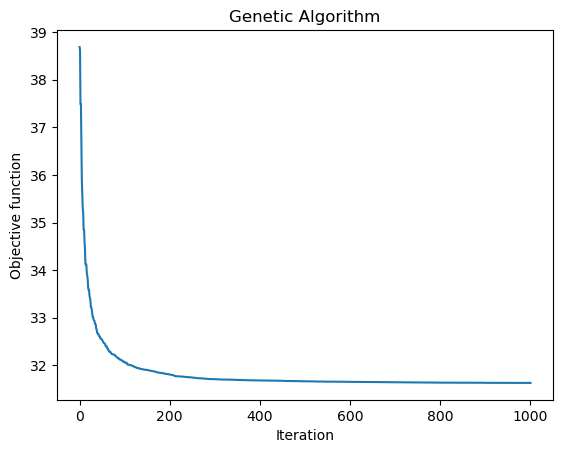

Best population distribution: [1092971.  378008.  688850.  427351.  325704. 1917345. 1621654.   67941.
  177644.  613221.  526132. 1118657.   77739.  298362.   84295.  279465.
  321215.  355799.  400418.  331350.  968666.  913083. 1173136.  138463.
  360937.  504065.  307553. 1274391. 1084228.  656275.  334875.  125284.
  314314.  464559.  488997.  167207. 1117518.  242249.  341492.  250705.
  408201. 1329600.  303927.  359838.  335112.   88581.  644064. 3023654.
  685297.  921664. 1023837.  687401. 1211689. 1003913.  302216.  277172.
  345230.  465606.  188784.  195338.  377828.  708657.  296202.  238172.
  818049.  494499.  505369.  364180.   98278.  317427. 1517132.   66264.
  469118.  164116.  485024.  230516.  659817. 4723690. 1343893. 1468615.
  375098.]


In [122]:
from geneticalgorithm import geneticalgorithm as ga
varbound = np.array([[initial_population[i] * 0.3, initial_population[i] * 1.7] for i in range(len(initial_population))])

algorithm_param = {
    'max_num_iteration': 1000,
    'population_size': 500,
    'mutation_probability': 0.01,
    'elit_ratio': 0.1,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type': 'uniform',
    'max_iteration_without_improv': 50
}

model = ga(function=function1,
           dimension=len(df),
           variable_type='int',
           variable_boundaries=varbound,
           algorithm_parameters=algorithm_param,
           function_timeout=1)

model.run()

# Output the best population distribution found
best_population = model.output_dict['variable']
print("Best population distribution:", best_population)

In [123]:
best_population.sum()

51855186.0

**The total population is not matching because the genetic algorithm does not accept any constraint function. But keeping the calculated ratio, we can scale the total population to equal the actual population.**

In [124]:
scale_factor = df["Nüfus"].sum() / best_population.sum()
best_population = best_population*scale_factor
best_population

array([1673528.34442696,  578795.87145509, 1054748.93666759,
        654348.57056519,  498709.36730548, 2935788.05251494,
       2483033.7985668 ,  104029.4657852 ,  272003.80359349,
        938947.80821984,  805599.4302777 , 1712858.0696026 ,
        119031.90475082,  456844.01864269,  129070.27889438,
        427909.43106018,  491835.92900004,  544790.0368983 ,
        613109.47190617,  507354.37346999, 1483195.80966255,
       1398088.58726755, 1796274.8763395 ,  212010.89064064,
        552657.20687231,  771811.02237257,  470917.03523108,
       1951313.8595467 , 1660141.29361287, 1004870.95653846,
        512751.7604218 ,  191831.55372209,  481269.29996332,
        711320.47799863,  748739.2985173 ,  256022.94469533,
       1711114.06286839,  370925.27423791,  522883.53615517,
        383872.87822784,  625026.59606104, 2035848.42301405,
        465364.99974533,  550974.44708223,  513114.6485658 ,
        135632.88895834,  986173.79566796, 4629739.19046338,
       1049308.67685489,

In [125]:
np.round(best_population).sum()

79399290.0

In [127]:
optimum_populations = np.round(best_population)
min_ind = np.where(optimum_populations==optimum_populations.min())
optimum_populations[min_ind] += df["Nüfus"].sum() - np.sum(optimum_populations)

In [128]:
optimum_populations.sum()

79399292.0

### Visualize optimum populations

In [129]:
df_optimum_populations = pd.Series(optimum_populations)
df_optimum_populations.name = "Nüfus"
df_merged_opt = pd.concat([df["Şehir"], df_optimum_populations, df_location[["lat", "lon"]]], axis=1)

In [130]:
map = folium.Map(location=[39.9334, 35.1597], zoom_start=6)

for i in range(len(df_merged_opt)):
    folium.CircleMarker([df_merged_opt.loc[i, 'lat'], df_merged_opt.loc[i, 'lon']], radius=df_merged_opt.loc[i, 'Nüfus']/150000,
                        popup=f"{df_merged_opt.loc[i,'Şehir']}: {df_merged_opt.loc[i,'Nüfus']}", fill=True).add_to(map)

map

## LINEAR PROGRAMMING

In [132]:
population_data = pd.read_csv('population.csv')

# Optimum population values to concatenate
optimum_population_values = list(optimum_populations)

# Check if the number of rows matches the number of new values
if len(df) == len(optimum_population_values):
    # Add the new column
    df['Optimum Population'] = optimum_population_values
    
    # Save the updated DataFrame to a new CSV file
    updated_file_path = 'optimum_population.csv'
    df.to_csv(updated_file_path, index=False)
    result = f"Updated dataset saved to {updated_file_path}"
else:
    result = "The length of the DataFrame and the list of optimized values do not match."

In [133]:
# Load the population data
population_data = pd.read_csv('data/optimum_population.csv')
#print("Population Data Preview:")
#print(population_data.head())

# Calculate the surplus or deficit
population_data.reset_index(drop=True, inplace=True)
population_data['Surplus_Deficit'] = population_data['Nüfus'] - population_data['Optimum Population']
# Reset index after dropping the first row
# Identify source and destination cities
source_cities = population_data[population_data['Surplus_Deficit'] > 0]
destination_cities = population_data[population_data['Surplus_Deficit'] < 0]

source_cities.to_csv('source_cities.csv', index=False)
destination_cities.to_csv('destination_cities.csv', index=False)


# Print identified cities
# print("Source Cities:")
# print(source_cities)
# print("\nDestination Cities:")
# print(destination_cities)

In [135]:
source_cities = pd.read_csv('source_cities.csv')
destination_cities = pd.read_csv('destination_cities.csv')

# Sum surplus_deficit column in source_cities.csv
source_sum = source_cities['Surplus_Deficit'].sum()
print("Sum of surplus_deficit in source_cities.csv:", source_sum)


# Sum surplus_deficit column in destination_cities.csv
destination_sum = destination_cities['Surplus_Deficit'].sum()
print("Sum of surplus_deficit in destination_cities.csv:", destination_sum)

Sum of surplus_deficit in source_cities.csv: 43875708.0
Sum of surplus_deficit in destination_cities.csv: -43875708.0


In [137]:
def turkish_upper(text):
    turkish_map = {
        'i': 'İ', 'ı': 'I',
        'ğ': 'Ğ', 'ç': 'Ç',
        'ş': 'Ş', 'ö': 'Ö',
        'ü': 'Ü'
    }
    return ''.join(turkish_map.get(c, c.upper()) for c in text)
# Load data
source_cities = pd.read_csv('source_cities.csv')
destination_cities = pd.read_csv('destination_cities.csv')
distances = pd.read_csv('ilmesafe.csv')

# Create dictionaries for populations
source_population = {row['Şehir']: int(row['Surplus_Deficit']) for index, row in source_cities.iterrows()}
destination_capacity = {row['Şehir']: int(abs(row['Surplus_Deficit'])) for index, row in destination_cities.iterrows()}

print('Source Population:', source_population)
print('-------------'*20)
print('Destination Capacity:', destination_capacity)


total_source_population = sum(source_population.values())
total_destination_capacity = sum(destination_capacity.values())
print('Total Source Population:', total_source_population)
print('Total Destination Capacity:', total_destination_capacity)

if total_source_population > total_destination_capacity:
    print('exceeds by: ', total_destination_capacity-total_source_population)
    print("Infeasibility Alert: Total source population exceeds total destination capacity.")
else:
    print('Values do fit.')


# # Print the totals
# print('Total Source Population:', total_source_population)
# print('Total Destination Capacity:', total_destination_capacity)


# Create a lookup table from the distances DataFrame, setting 'İL ADI' as the index
distances.set_index('İL ADI', inplace=True)

# Build the distance matrix correctly mapped by city names
num_source_cities = len(source_cities)
num_destination_cities = len(destination_cities)
distance_matrix = np.zeros((num_source_cities, num_destination_cities))
for i, src_city in enumerate(source_cities['Şehir']):
    src_city = turkish_upper(src_city)
    for j, dest_city in enumerate(destination_cities['Şehir']):
        dest_city = turkish_upper(dest_city)
        if dest_city in distances.columns:
            # print('dest_city', dest_city)
            # print('Distance:', distances.at[src_city, dest_city])
            distance_matrix[i][j] = distances.at[src_city, dest_city]
#
# Define the LP problem
prob = lp.LpProblem("Population_Redistribution", lp.LpMinimize)

# Create variables
transfer = [[lp.LpVariable(f"transfer_{i}_{j}", lowBound=0, cat='Continuous')
             for j in range(num_destination_cities)] for i in range(num_source_cities)]


print("Distance Matrix:\n", distance_matrix)
# distance_matrix = np.random.randint(10, 200, size=(num_source_cities, num_destination_cities))

# Objective function: Minimize total transportation cost
prob += lp.lpSum(transfer[i][j] * distance_matrix[i][j]
                 for i in range(num_source_cities)
                 for j in range(num_destination_cities))

# Constraints
# Each source city's total outgoing population must not exceed its total population
for i, src_city in enumerate(source_cities['Şehir']):
    prob += lp.lpSum(transfer[i][j] for j in range(num_destination_cities)) <= source_population[src_city]

# Demand constraints for each destination city
# Each destination city's incoming population should match its optimum capacity

for j, dest_city in enumerate(destination_cities['Şehir']):
    prob += lp.lpSum(transfer[i][j] for i in range(num_source_cities)) == destination_capacity[dest_city]


# # Adding minimum transfer requirements (e.g., at least 5000 people must be sent)
# min_transfer = 5000  # Minimum number of people each city must send to each destination
# for i in range(num_source_cities):
#     for j in range(num_destination_cities):
#         min_transfer = np.random.randint(3000, 10000)
#         prob += transfer[i][j] >= min_transfer


# Solve the problem
prob.solve()
# Function to collect results, create a dataset, and print the results
def print_and_create_dataset():
    results = []  # List to hold the transfer data
    if lp.LpStatus[prob.status] == 'Optimal':
        print("Optimal solution found:\n")
        for i, src_city in enumerate(source_cities['Şehir']):
            for j, dest_city in enumerate(destination_cities['Şehir']):
                amount = transfer[i][j].value()
                if amount > 0:
                    # Record this transfer in the results list
                    results.append({
                        'Source City': src_city,
                        'Destination City': dest_city,
                        'Amount': int(amount)
                    })
                    # Print the transfer details
                    print(f"{src_city} sent {int(amount):,} people to {dest_city}")
        # Convert list of dictionaries into a DataFrame
        results_df = pd.DataFrame(results)
        return results_df
    else:
        print("No optimal solution. Status:", lp.LpStatus[prob.status])
        return pd.DataFrame()  # Return an empty DataFrame if no solution is found

# Call the function and receive the dataset
transfer_dataset = print_and_create_dataset()

# Optionally, display or save the DataFrame
print(transfer_dataset)
transfer_dataset.to_csv('transfer_results.csv',index=False)

Source Population: {'Adana': 1881808, 'Ankara': 4991953, 'Antalya': 2193307, 'Aydın': 941110, 'Balıkesir': 457546, 'Batman': 141482, 'Bursa': 1929014, 'Diyarbakır': 1454505, 'Düzce': 73684, 'Elazığ': 372699, 'Erzurum': 493448, 'Gaziantep': 1909207, 'Hatay': 831030, 'Kayseri': 1095368, 'Kocaeli': 1962024, 'Manisa': 962716, 'Mardin': 342435, 'Mersin': 796137, 'Ordu': 217552, 'Sakarya': 37574, 'Tekirdağ': 129114, 'İstanbul': 15132288, 'İzmir': 3927881, 'Şanlıurfa': 1601817}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Destination Capacity: {'Adıyaman': 1024409, 'Afyonkarahisar': 1014623, 'Aksaray': 671164, 'Amasya': 159154, 'Ardahan': 2540860, 'Artvin': 1915266, 'Ağrı': 1254072, 'Bartın': 865406, 'Bayburt': 158443, 'Bilecik': 893701, 'Bingöl': 920673, 'Bitlis': 1926726, 'Bolu'

visualization

In [143]:
def turkish_lower(text):
    turkish_map = {
        'İ': 'i', 'I': 'ı',
        'Ğ': 'ğ', 'Ç': 'ç',
        'Ş': 'ş', 'Ö': 'ö',
        'Ü': 'ü'
    }
    return ''.join(turkish_map.get(c, c.lower()) for c in text)

def normalize_city_name(name):
    name = turkish_lower(name)
    return name.strip()

df_population = pd.read_csv('population.csv', encoding='utf-8')
df_location = pd.read_csv('corrected_location.csv', encoding='utf-8')

df_population.columns = df_population.columns.str.strip()
df_location.columns = df_location.columns.str.strip()

df_population['Şehir'] = df_population['Şehir'].apply(turkish_lower)
df_location['Şehir'] = df_location['Şehir'].apply(normalize_city_name)


df_cities = pd.merge(df_population, df_location, left_on='Şehir', right_on='Şehir')



m = folium.Map(location=[39.9334, 32.8597], zoom_start=6)

for idx, row in df_cities.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"{row['Şehir']}: {row['Nüfus']:,} people",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)


transfer_dataset = pd.read_csv('transfer_results.csv', encoding='utf-8')
transfer_dataset['Source City'] = transfer_dataset['Source City'].apply(turkish_lower)
transfer_dataset['Destination City'] = transfer_dataset['Destination City'].apply(turkish_lower)


for idx, row in transfer_dataset.iterrows():
    src_city = row['Source City']
    dest_city = row['Destination City']
    amount = row['Amount']
  
    if src_city in df_cities['Şehir'].values and dest_city in df_cities['Şehir'].values:
        src_coords = df_cities[df_cities['Şehir'] == src_city][['lat', 'lon']].values[0]
        dest_coords = df_cities[df_cities['Şehir'] == dest_city][['lat', 'lon']].values[0]

        folium.PolyLine(
            locations=[src_coords, dest_coords],
            popup=f"{src_city} to {dest_city}: {amount:,} people",
            color='red',
            weight=2,
            opacity=0.6
        ).add_to(m)


m